In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from vit import VisionTransformer
from utils import get_n_params, device, imshow
device

'cpu'

In [2]:
transforms_test = transforms.Compose([
	transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset_test  = torchvision.datasets.CIFAR10(root='data/', train=False, download=True, transform=transforms_test)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=100, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
	       'dog', 'frog', 'horse', 'ship', 'truck')

images, labels = next(iter(test_loader))
_, num_ch, size, _ = images.shape

Files already downloaded and verified


In [3]:
model_cfg = {
    "img_size": size,
    "in_chans": num_ch,
    "patch_size": 32,
    "embed_dim": 384,
    "depth": 3,
    "n_heads": 3,
    "qkv_bias": True,
    "mlp_ratio": 2,
    "n_classes": len(classes),
    "p": 0.2,
    "attn_p": 0.2
}

model_vit = VisionTransformer(**model_cfg)
model_vit.load_state_dict(torch.load('weights/vit_best.pth'))
model_vit.eval().to(device);

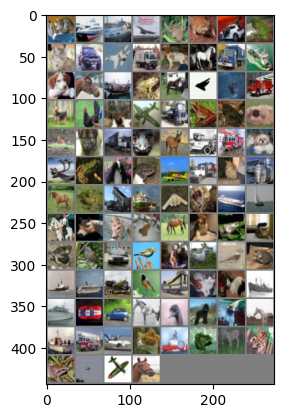

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship  dog   horse ship  frog  horse plane deer  truck dog   bird  deer  plane truck frog  frog  dog   deer  dog   truck bird  deer  car   truck dog   deer  frog  dog   frog  plane truck cat   truck horse frog  truck ship  plane cat   ship  ship  horse horse deer  frog  horse cat   frog  cat   frog  bird  car   bird  cat   horse bird  frog  ship  ship  plane bird  truck cat   cat   ship  ship  car   car   horse bird  dog   bird  horse ship  truck plane cat   ship  frog  deer  frog  frog  plane plane horse


In [4]:
images, labels = next(iter(test_loader))

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[j]:5s}' for j in labels))

In [5]:
with torch.no_grad():
  outputs = model_vit(images.to(device))
_, predicted = torch.max(outputs, 1)
acc = ((predicted == labels.to(device)) * 1.).mean() * 100

print('Predicted: ', ' '.join(f'{classes[j]:5s}'
                              for j in predicted))
print(f'\nAccuracy is {acc}%')

Predicted:  cat   car   ship  ship  deer  frog  cat   deer  plane car   plane car   car   horse car   ship  dog   horse ship  horse horse plane plane truck deer  frog  horse truck car   frog  bird  bird  horse cat   truck horse cat   car   car   dog   plane frog  cat   cat   plane ship  dog   dog   deer  frog  truck ship  frog  cat   ship  ship  horse car   cat   bird  horse dog   horse truck cat   deer  car   plane cat   truck frog  deer  ship  ship  truck deer  truck dog   cat   plane ship  car   car   plane plane truck ship  ship  ship  truck ship  deer  car   frog  deer  cat   deer  plane plane cat  

Accuracy is 42.0%
